**Text Analysis of COVID 19 tweets using text mining**

In [ ]:
!pip install twitter
!pip install tweepy

     |████████████████████████████████| 50 kB 6.1 MB/s 


text analysis of COVID 19 tweets using text mining 

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 100
import twitter
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud  
import seaborn as sns
import os
import tweepy as tw
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tqdm import tqdm, notebook
import datetime


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Establishing the access to twitter api

tw={
    'consumer_key': 'N8gYBUQGQjptKrDDFGVjG5RpE',
    'consumer_secret': 'wh0QdJwyp7Rl429GtUO5bFR2QeD4hslbFvhwRrg3cEyPdcqBhV',
    'access_token': '1398478879379972096-oaHxmLYS3faENWqWlfVK6t3yEd56nZ',
    'access_token_secret': 'ACrrB92jpsGZxtowiyI9t5pSJkGLia3gu7VSQLzuuRJCj',
   }


auth = twitter.oauth.OAuth(tw['access_token'],
                           tw['access_token_secret'],
                           tw['consumer_key'],
                           tw['consumer_secret'])

twitter_api = twitter.Twitter(auth=auth)
api = tweepy.API(auth)


In [ ]:
consumer_key= 'N8gYBUQGQjptKrDDFGVjG5RpE'
consumer_secret= 'wh0QdJwyp7Rl429GtUO5bFR2QeD4hslbFvhwRrg3cEyPdcqBhV'
access_token= '1398478879379972096-oaHxmLYS3faENWqWlfVK6t3yEd56nZ'
access_token_secret= 'ACrrB92jpsGZxtowiyI9t5pSJkGLia3gu7VSQLzuuRJCj'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

snscrape

In [ ]:
# install Anaconda3
!wget -qO ac.sh https://repo.anaconda.com/archive/Anaconda3-2020.07-Linux-x86_64.sh 
!bash ./ac.sh -b

# a fake google.colab library
!ln -s /usr/local/lib/python3.7/dist-packages/google \
       /root/anaconda3/lib/python3.8/site-packages/google

# start jupyterlab, which now has Python3 = 3.8
!nohup /root/anaconda3/bin/jupyter-lab --ip=0.0.0.0&

# access through ngrok, click the link
!pip install pyngrok -q
from pyngrok import ngrok
print(ngrok.connect(8888))


In [ ]:
!pip install kora
import kora.install.py38

In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\aki\appdata\local\temp\pip-req-build-crpp0xzr


  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\Aki\AppData\Local\Temp\pip-req-build-crpp0xzr'


In [ ]:
df = pd.DataFrame()
for i in range(1, 30):
   os.system("snscrape --jsonl --max-results 10 --since 2020-06-01 twitter-search \"#covid19 india until:2020-07-%d\" > text-query-tweets.json" % i)
   tmp_df = pd.read_json('text-query-tweets.json', lines=True)
   df = df.append(tmp_df, ignore_index=True)
df.head(20)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/Subhash49749615/status/127...,2020-06-30 23:48:00+00:00,Waah 👌👌👌👌 Good news #COVAXIN #COVID19 @Subhash...,Waah 👌👌👌👌 Good news #COVAXIN #COVID19 @Subhash...,1278113083945172993,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[COVAXIN, COVID19, Viral, India, world]",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/tribunephl/status/12781128...,2020-06-30 23:47:06+00:00,#India Commonwealth Games Village Sports Compl...,#India Commonwealth Games Village Sports Compl...,1278112858333523968,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[India, COVID19]",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/WREDC_Tony/status/12781118...,2020-06-30 23:43:08+00:00,"@realDonaldTrump Canada, Australia, Algeria, M...","@realDonaldTrump Canada, Australia, Algeria, M...",1278111861519585280,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.278099e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Covid19, WakeUpAmerica, Masks4All]",NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/ians_india/status/12781094...,2020-06-30 23:33:32+00:00,Another 155 #COVID19 patients have died in Bri...,Another 155 #COVID19 patients have died in Bri...,1278109445042495489,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[COVID19, coronavirus]",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/ians_india/status/12781091...,2020-06-30 23:32:29+00:00,The #COVID19 pandemic is not significantly imp...,The #COVID19 pandemic is not significantly imp...,1278109180474175488,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,[COVID19],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,snscrape.modules.twitter.Tweet,https://twitter.com/covidnewsCH/status/1288256...,2020-07-28 23:33:26+00:00,#CoronaInfoCH #COVID19 #corona #india \nCovid-...,#CoronaInfoCH #COVID19 #corona #india \nCovid-...,1288256279711027201,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,NaN,None,None,None,None,"[CoronaInfoCH, COVID19, corona, india]",NaN
286,snscrape.modules.twitter.Tweet,https://twitter.com/scottlambkin/status/128825...,2020-07-28 23:31:27+00:00,Anyone travelling into a high #COVID19 country...,Anyone travelling into a high #COVID19 country...,1288255779846291457,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,NaN,None,None,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","[COVID19, USA, Brazil, India, Indonesia, Russi...",NaN
287,snscrape.modules.twitter.Tweet,https://twitter.com/IndiaToday/status/12882554...,2020-07-28 23:30:00+00:00,A tally of data reported by states by evening ...,A tally of data reported by states by evening ...,1288255416263221250,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,4,4,...,None,NaN,NaN,NaN,None,None,None,None,"[Covid19, RE]",NaN
288,snscrape.modules.twitter.Tweet,https://twitter.com/CoronavirusNewv/status/128...,2020-07-28 23:27:48+00:00,🌍 | MUNDO\n\nPaises con más nuevos casos de #...,🌍 | MUNDO\n\nPaises con más nuevos casos de #...,1288254862069772295,"{'_type': 'snscrape.modules.twitter.User', 

In [ ]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 10 --since 2020-06-01 twitter-search \"#covid19 india until:2020-07-31\" > text-query-tweets.json")

0

In [ ]:
import pandas as pd
tweets_df = pd.read_json('text-query-tweets.json', lines=True)
tweets_df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/realhumanrights/status/128...,2020-07-30 23:57:24+00:00,In Global #COVID19 #CoronavirusPandemic:\n#PRC...,In Global #COVID19 #CoronavirusPandemic:\n#PRC...,1288987087082065923,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,1.288984e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,"[COVID19, CoronavirusPandemic, PRC, India, USA]",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/BureaucracyBuzz/status/128...,2020-07-30 23:56:21+00:00,"Daily coronavirus cases in #India top 50,000 f...","Daily coronavirus cases in #India top 50,000 f...",1288986823679553536,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,None,NaN,NaN,NaN,None,None,NaN,NaN,"[India, COVID19]",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/lawfareblog/status/1288986...,2020-07-30 23:54:22+00:00,The US should consider exporting to Africa the...,The US should consider exporting to Africa the...,1288986324620521477,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,6,14,...,None,NaN,NaN,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,[COVID19],NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/IndiaInGuate/status/128898...,2020-07-30 23:50:55+00:00,"Despite Corona and distance, India is leading ...","Despite Corona and distance, India is leading ...",1288985454705020930,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,38,211,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,[COVID19],NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/2536luis/status/1288985441...,2020-07-30 23:50:52+00:00,"July 30, 2020\n\n#LosAngeles #NewYork #Washing...","July 30, 2020\n\n#LosAngeles #NewYork #Washing...",1288985441077571584,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,None,None,NaN,NaN,"[LosAngeles, NewYork, Washington, NewOrleans, ...",NaN
5,snscrape.modules.twitter.Tweet,https://twitter.com/htTweets/status/1288985224...,2020-07-30 23:50:00+00:00,#COVID19 herd immunity can’t be a strategic op...,#COVID19 herd immunity can’t be a strategic op...,1288985224001589250,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,4,11,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,None,None,NaN,NaN,[COVID19],NaN
6,snscrape.modules.twitter.Tweet,https://twitter.com/covidnewsCH/status/1288981...,2020-07-30 23:35:10+00:00,#CoronaInfoCH #COVID19 #corona #india \nThe st...,#CoronaInfoCH #COVID19 #corona #india \nThe st...,1288981491486203909,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,NaN,None,None,NaN,NaN,"[CoronaInfoCH, COVID19, corona, india]",NaN
7,snscrape.modules.twitter.Tweet,https://twitter.com/covidnewsCH/status/1288981...,2020-07-30 23:34:24+00:00,#CoronaInfoCH #COVID19 #corona #india \nIndia ...,#CoronaInfoCH #COVID19 #corona #india \nIndia ...,1288981301094158337,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,NaN,None,None,NaN,NaN,"[CoronaInfoCH, COVID19, corona, india]",NaN
8,snscrape.modules.twitter.Tweet,https://twitter.com/Makarov_Igor/status/128898...,2020-07-30 23:31:53+00:00,Almost two-thirds (64.3% to be exact) of all n...,Almost two-thirds (64.3% to be exact) of all n...,1288980664533082115,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,NaN,NaN,None,None,NaN,NaN,[COVID19],NaN
9,snscrape.modules.twitter.Tweet,https://twitter.com/AIRNewsHindi/status/128898...,2020-07-30 23:31:00+00:00,कोरोना की वजह से फैली नकारात्मकता कैसे कम करें...,कोरोना की वजह से फैली नकारात्मकता कैसे कम करें...,1288980442838757377,"{'_type': 'snscrape.modules.twitter.User', 'us..

In [ ]:
#First wave
df = pd.DataFrame()
for m in range(4, 13):
   for d in range(1, 31):
      os.system("snscrape --jsonl --max-results 10 --since 2020-04-01 twitter-search \"#covid19 india until:2020-%d-%d\" > text-query-tweets.json" % (m, d))
      tmp_df = pd.read_json('text-query-tweets.json', lines=True)
      df = df.append(tmp_df, ignore_index=True)
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/DavidInglesTV/status/12455...,2020-04-01 23:57:03+00:00,"The last two days, especially in India and the...","The last two days, especially in India and the...",1245500455938961408,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,8,17,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,NaN,None,NaN,NaN,[COVID19],NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/TPE_connect/status/1245499...,2020-04-01 23:55:00+00:00,Police arrest man who dressed as a doctor to b...,Police arrest man who dressed as a doctor to b...,1245499938223435776,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,NaN,None,NaN,NaN,"[Noida, UttarPradesh, Lockdown, India, Coronav...",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/AsiaAINews/status/12454987...,2020-04-01 23:50:14+00:00,🔥 Hot off the press: “Odd Concepts raises $10m...,🔥 Hot off the press: “Odd Concepts raises $10m...,1245498738925359105,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,NaN,NaN,None,NaN,NaN,"[AsiaAI, China, India, Singapore, SouthKorea, ...",NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/PIBBhubaneswar/status/1245...,2020-04-01 23:47:13+00:00,#COVID19 updates from #Odisha\n\nA 60 year old...,#COVID19 updates from #Odisha\n\nA 60 year old...,1245497982255894531,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,11,...,None,NaN,None,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[COVID19, Odisha, Bhubaneswar, COVID19]",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/LifeAtLightSpe1/status/124...,2020-04-01 23:46:12+00:00,When people don't understand that number of co...,When people don't understand that number of co...,1245497724159451136,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,None,NaN,NaN,"[coronavirus, covid19, india]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,snscrape.modules.twitter.Tweet,https://twitter.com/TaylorIndiana/status/13440...,2020-12-29 23:05:47+00:00,@ChineseEmbinUS Such lies. You control what Po...,@ChineseEmbinUS Such lies. You control what Po...,1344057055120801792,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.343966e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[china, ChinaVirus, ChinaLiedPeopleDied, China...",NaN
2686,snscrape.modules.twitter.Tweet,https://twitter.com/abhinitk/status/1344056393...,2020-12-29 23:03:10+00:00,Only in India the restaurants are allowed to b...,Only in India the restaurants are allowed to b...,1344056393976856580,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,NaN,NaN,[COVID19],NaN
2687,snscrape.modules.twitter.Tweet,https://twitter.com/DestinAsian_Mag/status/134...,2020-12-29 23:00:00+00:00,"Hong Kong, India Ban Flights from the U.K.\n\n...","Hong Kong, India Ban Flights from the U.K.\n\n...",1344055597935648770,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,NaN,NaN,"[Britain, COVID19, TravelBan, HongKong, India]",NaN
2688,snscrape.modules.twitter.Tweet,https://twitter.com/R85Ruiz/status/13440548416...,2020-12-29 22:57:00+00:00,India esta en medio de una guerra en contra de...,India esta en medio de una guerra en contra de...,1344054841635557376,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[Covid19, Internacional]",NaN


In [ ]:
df.to_csv('wave1_tweets.csv', index=False)

In [ ]:
search_words = "#covid19 -filter:retweets"


date_since = "2020-04-01"
date_until="2021-06-28"
number=14000

tweets =  tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              tweet_mode="extended",
              count=number,
              geocode="20.5937,78.9629,3000km").items(100)

search_results = twitter_api.search.tweets(q=search_words, count=number, lang='en',since=date_since)

for tweet in tweets:
  print(tweet.created_at)
  print(tweet.place)
  #print(tweet.full_text)

In [ ]:
#for first dataset
q = ['covid19', "COVID-19", "pandemic", "corona", "coronavirus", "lockdown", "india", "online", "mask", "#covid", "#COVID-19", "#staysafe"]
date_since = "2020-04-01"
until_date="2021-02-01"

In [ ]:
def collect_tweets(q, count=2000):
    df = pd.DataFrame(columns=['keyword', 'location', 'text', 'target'])
    for q in q:
        search_results = twitter_api.search.tweets(q=q, count=count, lang='en',since=date_since)
        tmp_df = pd.DataFrame(
            data=[[q, s['user']['location'], s['text'], None] for s in search_results['statuses']],
             columns = ['keyword', 'location', 'text', 'target'],
            )
        df = df.append(tmp_df, ignore_index=True)
    
    return df

In [ ]:
tweets_wave1 = collect_tweets(q, count=2000)
tweets_wave1

,keyword,location,text,target
0,covid19,,MYANMAR NEEDS OXYGEN. 🇲🇲\n\n#COVID19 infection rate is out of control and OXYGEN demand is very high. Junta SAC forci… https://t.co/ZWPBis5KTv,None
1,covid19,,RT @DebandezScott: Where was the push from @BorisJohnson et al to improve metabolic health. We have known almost from the beginning that #c…,None
2,covid19,Japan神奈川,RT @shafiur: #July11Coup #Myanmar\n\nCOVID19 CRISIS EXACERBATED BY NEW SAC JUNTA ORDER\n\nTragic post on Facebook. Woman posted how her mother…,None
3,covid19,,RT @MayWongCNA: A #Myanmar red cross worker witnessed how some patients who may be #Covid19-infected have died outside #Yangon hospital as…,None
4,covid19,,"@BillKristol the CON serving CONservative GOP = Ghouls of Politics, Group of Perpetrator’s believe in, &amp; practice i… https://t.co/ccuTQXURoT",None
5,covid19,,"RT @cape_diamond: My social media newsfeed is turning into the horrible place where I see the death announcements of friends, relatives and…",None
6,covid19,United States,Junta's arbitrarily abductions are happening all over the country and also Death Rate of #COVID19 (OXYGEN DEPLETION… https://t.co/F3ykcNpciI,None
7,covid19,Myanmar,RT @shafiur: #July11Coup #Myanmar\n\nCOVID19 CRISIS EXACERBATED BY NEW SAC JUNTA ORDER\n\nTragic post on Facebook. Woman posted how her mother…,None
8,covid19,,RT @portiagumedesa: This immediate effect approach isn't going to keep working out for long. Businesses can't keep up with this kind of app…,None
9,covid19,,RT @KhushnumaKashm1: The event proved to be a good platform for supporting the warriors fighting against the deadly virus and reassuring th…,None


In [ ]:
tweets_wave1.to_csv('tweets_wave1.csv', index=False)

In [ ]:
!ls tweets_wave1.csv -l

In [ ]:
df = pd.read_csv("tweets_wave1.csv")

In [ ]:
df = pd.read_csv("wave1_tweets.csv")

In [ ]:
df.count ()

_type               2690
url                 2690
date                2690
content             2690
renderedContent     2690
id                  2690
user                2690
replyCount          2690
retweetCount        2690
likeCount           2690
quoteCount          2690
conversationId      2690
lang                2690
source              2690
sourceUrl           2690
sourceLabel         2690
outlinks            1339
tcooutlinks         1339
media                971
retweetedTweet         0
quotedTweet          227
inReplyToTweetId     284
inReplyToUser        284
mentionedUsers       955
coordinates           78
place                 78
hashtags            2690
cashtags               9
dtype: int64

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')

In [ ]:
# snscraper tweets
df['Tweet'] = np.vectorize(remove_pattern)(df['content'], '@[\w]*')

In [ ]:
df.head(2)

In [ ]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df.head(3)

In [ ]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

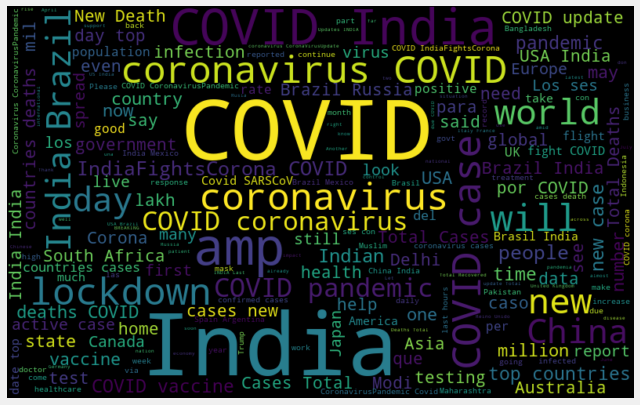

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def polarity(text):
  return TextBlob(text).sentiment.polarity 

In [ ]:
df['Subjectivity']=df['Tweet'].apply(subjectivity)
df['Polarity']=df['Tweet'].apply(polarity )
df                                                   #runtime disconnect

In [ ]:
def analysis(score):
  if score < -.075:
    return "extremely negative"
  elif score < 0 and score > -0.75:
    return "negative"
  elif score == 0:
    return "neutral"
  if score > 0.75:
    return "extremely positive"
  else:
    return "positive"

df["sentiment"]=df["Polarity"].apply(analysis)

df                                                   #runtime disconnect

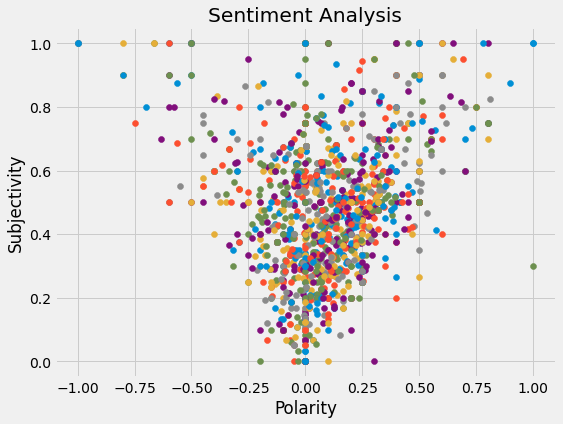

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i])

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


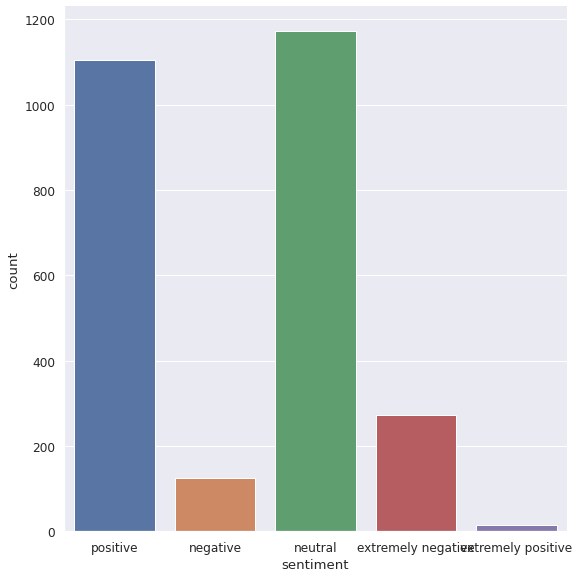

In [ ]:
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=df, kind="count", height=8)

In [ ]:
# percentages of sentiments in wave 1
eptweets=df[df.sentiment=="extremely positive"]
eptweets=eptweets['Tweet']
print("extremely positve tweets in wave one", round((eptweets.shape[0]/df.shape[0])*100, 1))

ptweets=df[df.sentiment=="positive"]
ptweets=ptweets['Tweet']
print("positve tweets in wave one", round((ptweets.shape[0]/df.shape[0])*100, 1))

nltweets=df[df.sentiment=="neutral"]
nltweets=nltweets['Tweet']
print("negative tweets in wave one", round((nltweets.shape[0]/df.shape[0])*100, 1))

ntweets=df[df.sentiment=="negative"]
ntweets=ntweets['Tweet']
print("negative tweets in wave one", round((ntweets.shape[0]/df.shape[0])*100, 1))

entweets=df[df.sentiment=="extremely negative"]
entweets=entweets['Tweet']
print("extremely negative tweets in wave one", round((entweets.shape[0]/df.shape[0])*100, 1))

extremely positve tweets in wave one 0.5
positve tweets in wave one 41.1
negative tweets in wave one 43.6
negative tweets in wave one 4.7
extremely negative tweets in wave one 10.1


In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
import random
text_data = []
with open('tweets_wave2.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

In [ ]:
import pandas as pd
import os

In [ ]:
#Second wave
df = pd.DataFrame()
for m in range(2, 11):
   for d in range(1, 29):
      os.system("snscrape --jsonl --max-results 50 --since 2021-01-01 twitter-search \"#covid19 india until:2021-%d-%d\" > text-query-tweets.json" % (m, d))
      tmp_df = pd.read_json('text-query-tweets.json', lines=True)
      df = df.append(tmp_df, ignore_index=True)
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/Bob36783646/status/1356389...,2021-02-01 23:52:20+00:00,@EReijnen check https://t.co/gNXLICY1FV Tijd o...,@EReijnen check c19legacy.com Tijd om heel vee...,1356389955673743363,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Ivermectine, COVID19]",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/Drnpokhriyal/status/135638...,2021-02-01 23:33:55+00:00,India &amp; Oman: Standing together in the fig...,India &amp; Oman: Standing together in the fig...,1356385320003076096,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[COVID19],NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/OnceNoticiasTV/status/1356...,2021-02-01 23:30:00+00:00,Uno de los sistemas ferroviarios urbanos más t...,Uno de los sistemas ferroviarios urbanos más t...,1356384334060478467,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,None,NaN,None,NaN,None,None,None,None,"[India, Covid19, OnceNoticias]",NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/ashmilca/status/1356382387...,2021-02-01 23:22:16+00:00,Maybe India can spot us some vaccines?\n\nProb...,Maybe India can spot us some vaccines?\n\nProb...,1356382387974889474,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[COVID19, CovidVaccine]",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/hugohugoajb/status/1356381...,2021-02-01 23:17:04+00:00,CORONAVIRUS: DATOS DE HOY EN ARGENTINA...\n\n#...,CORONAVIRUS: DATOS DE HOY EN ARGENTINA...\n\n#...,1356381079599521797,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[COVID19, coronavirus, pandemia, OMS, OPS, Arg...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,snscrape.modules.twitter.Tweet,https://twitter.com/VjEngr/status/145159688891...,2021-10-22 17:10:42+00:00,I paid ₹1350 for first dose and ₹1410 for seco...,I paid ₹1350 for first dose and ₹1410 for seco...,1451596888914870272,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,NaN,NaN,"[COVID19, India]",NaN
3446,snscrape.modules.twitter.Tweet,https://twitter.com/bhuchungtsering/status/145...,2021-10-22 17:09:10+00:00,This! #India administers one billion #COVID19 ...,This! #India administers one billion #COVID19 ...,1451596504955764753,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,NaN,None,None,NaN,NaN,"[India, COVID19]",NaN
3447,snscrape.modules.twitter.Tweet,https://twitter.com/IndiaToday/status/14515954...,2021-10-22 17:05:03+00:00,Is the worst of the Covid pandemic over? \nTop...,Is the worst of the Covid pandemic over? \nTop...,1451595469529001984,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,2,6,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[coronavirus, covid19]",NaN
3448,snscrape.modules.twitter.Tweet,https://twitter.com/ShikshaNews/status/1451595...,2021-10-22 17:03:29+00:00,PM Narendra Modi on India Achieving 100 Crore ...,PM Narendra Modi on India Achieving 100 Crore ...,1451595075499151363,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,NaN,NaN,"[vaccination, COVID19, 100CroreVaccination, Va...",NaN


In [ ]:
#for second dataset
q = ['covid19', "COVID-19", "pandemic", "corona", "coronavirus", "vaccine", "india","vaccination", "black fungus"]
date_since = "2021-03-21"

In [ ]:
def collect_tweets(q, count=2000):
    df = pd.DataFrame(columns=['keyword', 'location', 'text', 'target'])
    for q in q:
        search_results = twitter_api.search.tweets(q=q, count=count, lang='en',since=date_since)
        tmp_df = pd.DataFrame(
            data=[[q, s['user']['location'], s['text'], None] for s in search_results['statuses']],
             columns = ['keyword', 'location', 'text', 'target'],
            )
        df = df.append(tmp_df, ignore_index=True)
    
    return df

In [ ]:
tweets_wave2 = collect_tweets(q, count=2000)
tweets_wave2

In [ ]:
tweets_wave2.to_csv('tweets_wave2.csv', index=False)

In [ ]:
df.to_csv('wave2_tweets.csv', index = False)

In [ ]:
df = pd.read_csv("wave2_tweets.csv")

In [ ]:
df = pd.read_csv("tweets_wave2.csv")

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')

In [ ]:
df['Tweet'] = np.vectorize(remove_pattern)(df['content'], '@[\w]*')

In [ ]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
df['Tweet']  = tokenized_tweet

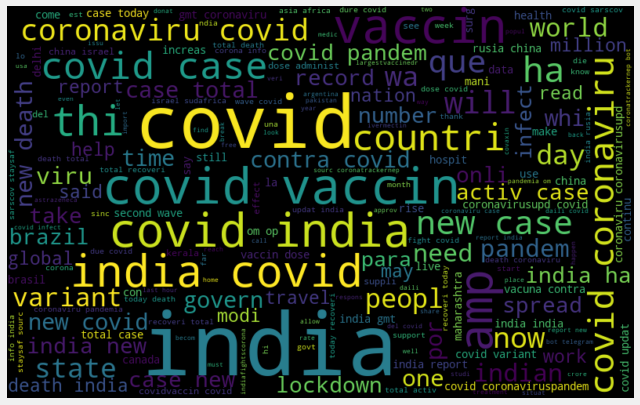

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity']=df['Tweet'].apply(subjectivity)
df['Polarity']=df['Tweet'].apply(polarity )
df

In [ ]:
def analysis(score):
  if score < -.075:
    return "extremely negative"
  elif score < 0 and score > -0.75:
    return "negative"
  elif score == 0:
    return "neutral"
  if score > 0.75:
    return "extremely positive"
  else:
    return "positive"

df["sentiment"]=df["Polarity"].apply(analysis)

df

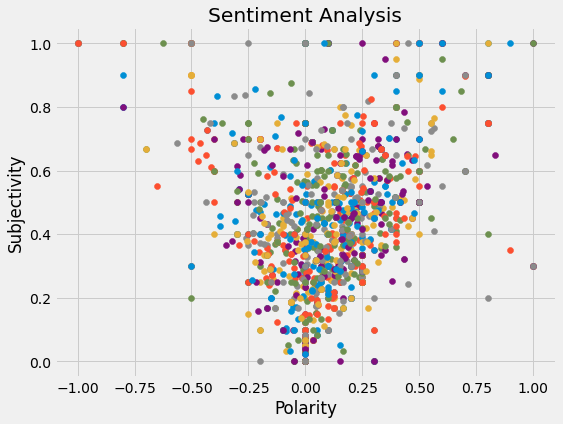

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i])

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


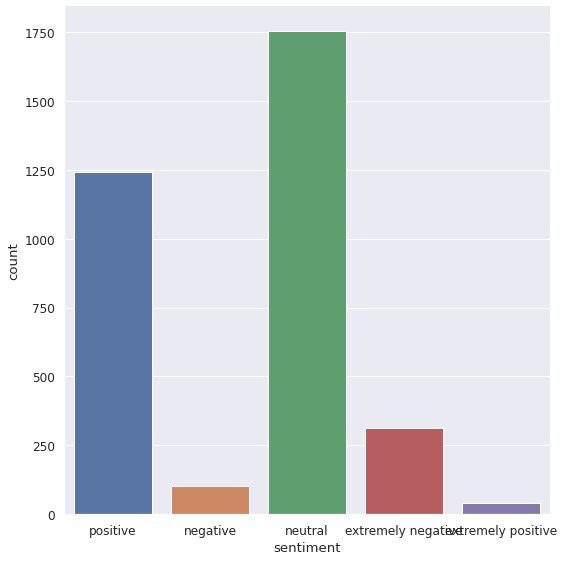

In [ ]:
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=df, kind="count", height=8, order=['positive', 'negative', 'neutral', 'extremely negative', 'extremely positive'])

In [ ]:
# percentages of sentiments in wave 1
eptweets=df[df.sentiment=="extremely positive"]
eptweets=eptweets['Tweet']
print("extremely positve tweets in wave two", round((eptweets.shape[0]/df.shape[0])*100, 1))

ptweets=df[df.sentiment=="positive"]
ptweets=ptweets['Tweet']
print("positve tweets in wave two", round((ptweets.shape[0]/df.shape[0])*100, 1))

nltweets=df[df.sentiment=="neutral"]
nltweets=nltweets['Tweet']
print("neutral tweets in wave two", round((nltweets.shape[0]/df.shape[0])*100, 1))

ntweets=df[df.sentiment=="negative"]
ntweets=ntweets['Tweet']
print("negative tweets in wave two", round((ntweets.shape[0]/df.shape[0])*100, 1))

entweets=df[df.sentiment=="extremely negative"]
entweets=entweets['Tweet']
print("extremely negative tweets in wave two", round((entweets.shape[0]/df.shape[0])*100, 1))

extremely positve tweets in wave two 1.2
positve tweets in wave two 35.9
neutral tweets in wave two 50.9
negative tweets in wave two 2.9
extremely negative tweets in wave two 9.1


In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
import random
text_data = []
with open('wave2_tweets.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['además', 'primerministroindio', 'amante', 'practicante', 'pilate', 'según', 'afirmaciones', 'líder', 'india', 'asegura', 'importante', 'practicar', 'ejercicio', 'meditación', 'porque', 'escudo', 'protector', 'virus.#covid19']
[]
['SCREEN_NAME', 'india', 'giving', 'birth', 'country', 'vaccine', 'malign', 'india']
[]
['covidvaccination']
['covid19', 'covidvaccination']
['source', 'coronatrackernepal_bot', 'telegram', '",1360340394043731969,"{\'_type', 'snscrape.modules.twitter', 'username', 'krishna444_test', '976098246882885634', 'displayname', 'world', 'alert', 'description', 'alerting', 'world', 'current', 'happening', 'disease', 'political', 'crisis', 'rawdescription', 'alerting', 'world', 'current', 'happening', 'disease', 'political', 'crisis', 'descriptionurls', 'verify', 'false', 'create', '20t14:08:51', '00:00', 'followerscount', 'friendscount', 'statusescount', '19573', 'favouritescount', 'listedcount', 'mediacount', 'location', 'karlsruhe', 'germany', 'protect', 'false', 'li

extremely positve tweets in wave one 0.5

positve tweets in wave one 41.1

negative tweets in wave one 43.6

negative tweets in wave one 4.7

extremely negative tweets in wave one 10.1

extremely positve tweets in wave two 0.8

positve tweets in wave two 31.0

negative tweets in wave two 56.2

negative tweets in wave two 2.9

extremely negative tweets in wave two 9.0

extremely positve tweets in wave two 1.2
positve tweets in wave two 35.9
neutral tweets in wave two 50.9
negative tweets in wave two 2.9
extremely negative tweets in wave two 9.1